In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
dataset=pd.read_csv(r"D:\Data Analysis Projects\DS_Playlist\datasets\loan_data_set.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


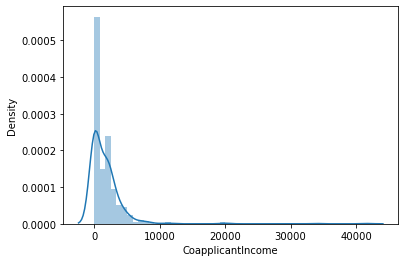

In [21]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [24]:
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1

In [25]:
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r,max_r

(-3445.875, 5743.125)

In [26]:
dataset=dataset[dataset["CoapplicantIncome"]<=max_r]

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


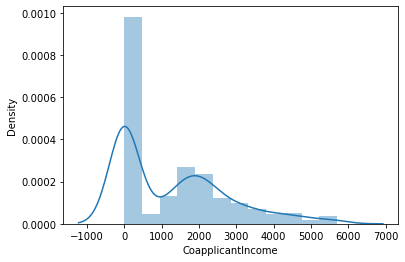

In [9]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [27]:
 from sklearn.preprocessing import FunctionTransformer

In [12]:
ft=FunctionTransformer(func=np.log1p)

In [13]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [14]:
ft.transform(dataset[["CoapplicantIncome"]])

,CoapplicantIncome
0,0.000000
1,7.319202
2,0.000000
3,7.765993
4,0.000000
...,...
609,0.000000
610,0.000000
611,5.484797
612,0.000000


In [15]:
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


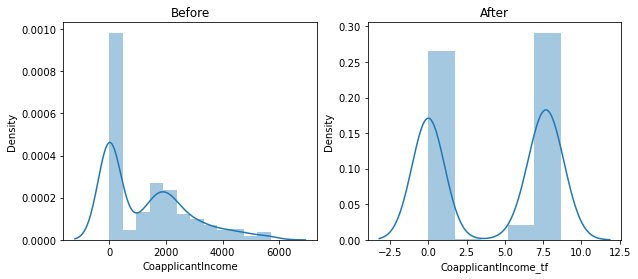

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_tf"])

plt.show()

In [28]:
ft1=FunctionTransformer(func= lambda x : x**2)
ft1.fit(dataset[["CoapplicantIncome"]])
ft1.transform(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_tf1"]=ft1.transform(dataset[["CoapplicantIncome"]])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


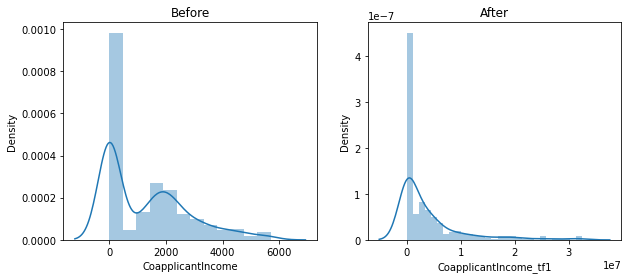

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_tf1"])

plt.show()